<a href="https://colab.research.google.com/github/Lu1sV1rus/EDP/blob/main/M%C3%A9todo_de_M%C3%ADnimos_Cuadr%C3%A1dos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font size=5>Método de Mínimos Cuadrádos

---



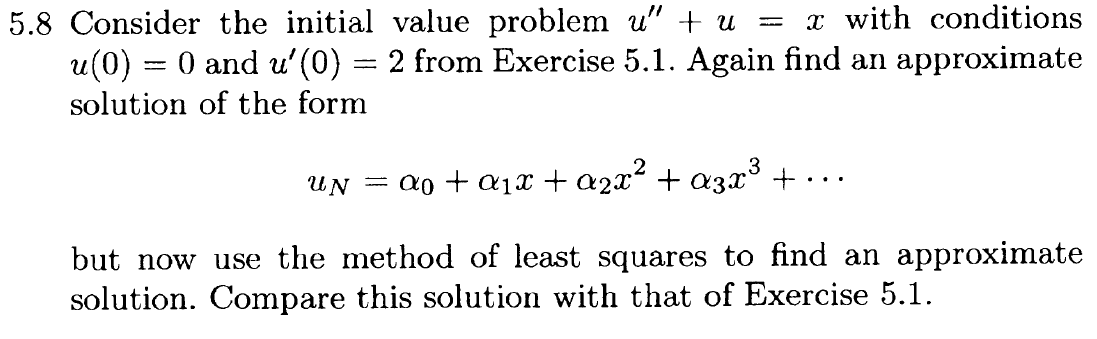

<font size=3> Importamos las librerias a utilizar

In [2]:
import sympy as sp                      # Para las soluciones, variables, ecuaciones
import numpy as np                      # Para los arrays (vectores) y graficas
import matplotlib.pyplot as plt         # Para las graficas
from tabulate import tabulate           # Para las tablas (presentar los errores)

<font size=3> Definimos las variables <font color=tomato>$x,a,b$

In [3]:
x, a, b = sp.symbols("x, a, b")         # Variables
u = sp.Function("u")                    # Funcion

<font size=3> Escribimos la ecuación a resolver <font color=tomato>$u''(x)+u(x)-x$

In [4]:
ecu = u(x).diff(x, 2) + u(x) - x        # Ecuacion
ecu

-x + u(x) + Derivative(u(x), (x, 2))

<font size=3> Resolvemos la ecuación con sympy, agregando las restricciones <font color=tomato>$u(0)=0$ </font><font size=3> y <font color=tomato>$u'(0)=0$

---

<font size=2 color=tomato>sp.dsolve(eq, func, hint='default', **kwargs)

<font size=2 color=tomato>sp.dsolve

Nos permite encontrar la solución analítica de la ecuacion $ecu$

<font size=2 color=tomato>eq

La ecuación diferencial

<font size=2 color=tomato>func

La función desconocida

<font size=2 color=tomato>hint

Indica el método de resolución que debe intentar SymPy (ej. 'separable', 'linear', '1st_linear')

<font size=2 color=tomato>ics={}

Le indica a dsolve que debe usar las condiciones iniciales proporcionadas

In [5]:
sol = sp.dsolve(ecu, ics={u(0):0, sp.diff(u(x), x).subs(x, 0):2})     # Solucionamos la ecuacion con las restricciones
sol

Eq(u(x), x + sin(x))

<font size=3> Creamos una funcion que nos regrese el valor exacto

---

<font size=2 color=tomato>sp.lambdify

Nos permite crear vectores para evaluar el vector $X$

<font size=2 color=tomato>sp.simplify

Reduce los valores a su forma mas simple, nos ayuda a que sea un numero (float), en lugar de una expresion (ej, 0.04+sin(10))

<font size=2 color=tomato>sol.rhs

Nos da el valor de la sol



In [6]:
valorex = sp.lambdify(x, sp.simplify(sol.rhs), "numpy")   # Creamos un metodo que nos regresa los valores exactos (reales)

<font size=3> Graficamos

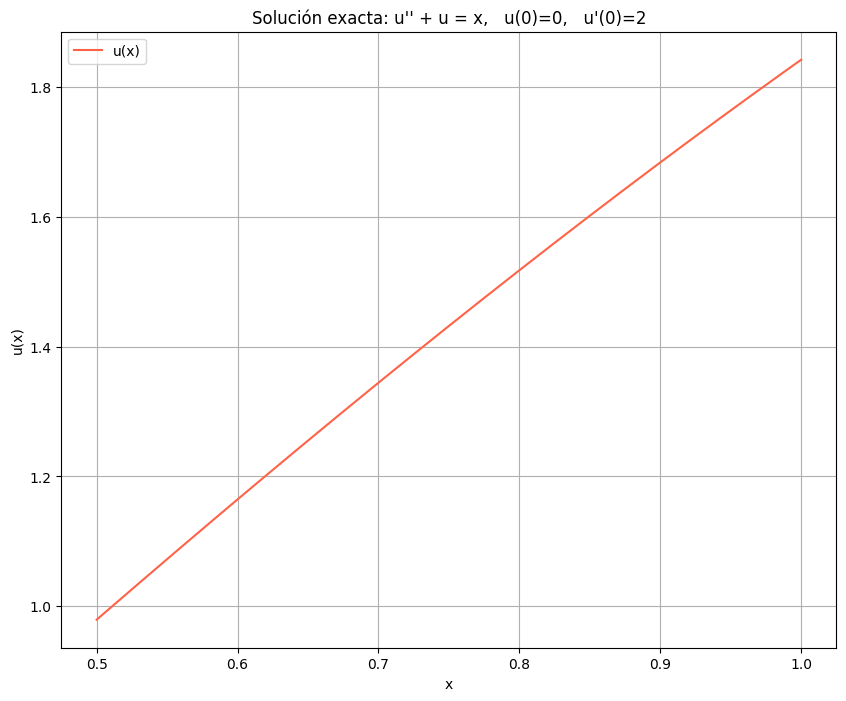

In [7]:
xx = np.linspace(0.5, 1, 200)                          # Valores en X
yy = valorex(xx)                                     # Valores en Y
plt.figure(figsize=(10,8))                           # Cramos un plano de 10x8
plt.plot(xx, yy, label="u(x)", color="tomato")     # Linea
plt.title("Solución exacta: u'' + u = x,   u(0)=0,   u'(0)=2")  # Titulo
plt.xlabel("x")                                      # Etiqueta en X
plt.ylabel("u(x)")                                   # Etiqueta en Y
plt.grid()                                           # Cuadricula
plt.legend()                                         # Etiquetas
plt.show()

<font size=3> Escribimos la ecuacion $u_N$ = $2x+ax^2+bx^3$

In [8]:
un = 2*x + a*x**2 + b*x**3              # Guardamos la ecuacion en un
un

a*x**2 + b*x**3 + 2*x

<font size=3> Calculamos la ecuacion $u_N''$ = $2a+6bx$

In [9]:
un2 = sp.simplify(sp.diff(un, x, 2))    # Guardamos la segunda derivada en un2, usamos simplify para reducir terminos
un2

2*a + 6*b*x

<font size=3> Definimos la ecuacion $e$ = $u_N''+u_N-x$

In [10]:
e = sp.simplify(un2 + un - x)           # Guardamos la ecuacion en e, usamos simplify para reducir terminos
e

a*x**2 + 2*a + b*x**3 + 6*b*x + x

<font size=3> Para aplicar el metodo necesitamos calcular el cuadrado = $e^2$

In [11]:
e2=sp.simplify(e**2)                    # Guardamos el cuadrado de e, usamos simplify para reducir terminos
e2

(a*x**2 + 2*a + b*x**3 + 6*b*x + x)**2

<font size=3> Debemos calcular tambien la integral del cuadrado = ∫$e^{2}$

---

<font size=2 color=tomato>sp.integrate</font><font size=2>(ecuacion,(variable,A,B))

Nos regresa el valor de la integral de una ecuacion

(<font size=2 color=tomato>ecuacion</font><font size=2>,())

En este caso la ecuacion es <font color=tomato>$e_2$</font>  = <font color=tomato>$e^2$

($e_2$,(<font size=2 color=tomato>variable,A,B</font><font size=2>))

La <font color=tomato>variable</font> a integrar es <font color=tomato>$x$</font>

<font color=tomato>A</font> es el limite inferor en este caso <font color=tomato>$0$</font>

<font color=tomato>B</font> es el limite superior en este caso <font color=tomato>$1$</font>

In [12]:
e22=sp.integrate(e2,(x,0,1))            # Guardamos la integral de e^2, usamos simplify para reducir terminos
e22=sp.simplify(e22)
e22

83*a**2/15 + 49*a*b/3 + 5*a/2 + 509*b**2/35 + 22*b/5 + 1/3

<font size=3> Finalmente calculamos las parciales con respecto a <font color=tomato>$∂a$ </font><font size=3> y <font color=tomato>$∂b$

In [13]:
pa = sp.diff(e22, a)                     # Calculamos la parcial de a
pb = sp.diff(e22, b)                     # Calculamos la parcial de b

<font size=3> Resolvemos las parciales <font color=tomato>$∂a$ </font><font size=3> y <font color=tomato>$∂b$

---

<font size=2 color=tomato>sp.solve(equacion, argumento)

<font size=2 color=tomato>sp.solve

Nos permite encontrar la solución analítica de la ecuacion <font color="tomato">$[p_a, p_b]$

<font size=2 color=tomato>$[parcial_a, parcial_b]$

Las ecuaciones de las parciales

<font size=2 color=tomato>[a,b]

Los argumentos que queremos encontrar (incognitas)

In [14]:
sol2 = sp.solve([pa, pb], [a, b])                  # Resolvemos las parciales
sol2

{a: -1335/86789, b: -24759/173578}

<font size=3> Creamos una funcion que nos regrese el valor esperado de la funcion

---

<font size=2 color=tomato>sp.lambdify

Nos permite crear vectores para evaluar el vector $X$

<font size=2 color=tomato>un.subs()

Sustituye los valores en un, por los que se obtiene de la $sol2$

<font size=2 color=tomato>sol2

Que contiene la solucion con mínimos cuadrádos ($points$=$0.5,1$)

In [15]:
valores = sp.lambdify(x, un.subs(sol2) , "numpy")    # Creamos un metodo que nos regresa los valores esperados (calculados con el metodo)

<font size=3> Graficamos

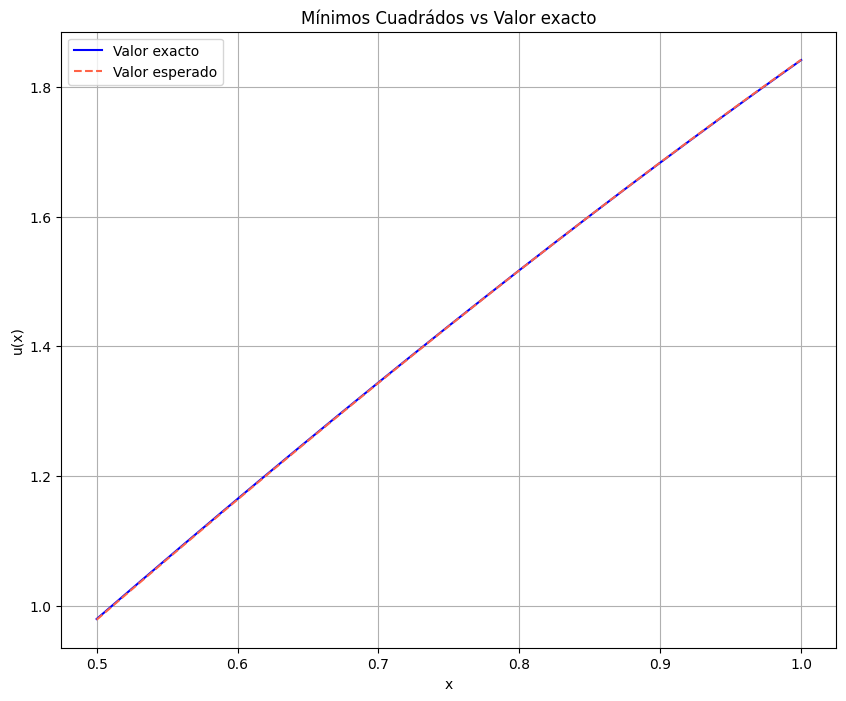

In [16]:
xx = np.linspace(0.5, 1, 200)                        # Valores en X
y2 = valores(xx)                                     # Valores en Y2 (esperados)
plt.figure(figsize=(10,8))                           # Cramos un plano de 10x8
plt.plot(xx, yy, label="Valor exacto", color="blue")            # Linea exactos
plt.plot(xx, y2,"--", label="Valor esperado", color="tomato")      # Linea esperados
plt.title("Mínimos Cuadrádos vs Valor exacto")    # Titulo
plt.xlabel("x")                                      # Etiqueta en X
plt.ylabel("u(x)")                                   # Etiqueta en Y
plt.grid()                                           # Cuadricula
plt.legend()                                         # Etiquetas
plt.show()                                           # Mostrar

<font size=3> Calculamos los valores con el Metodo de Puntos de Colocacion

---

In [17]:
# Extraido mi Github (Metodo de Puntos de Colocacion)
points = [sp.Rational(1, 2), 1]                               # Creamos un vector con los valores de los puntos de colocacion
ecupuntos = [sp.Eq(e.subs(x, p), 0) for p in points]          # Planteamos la ecuacion 2
solpuntos = sp.solve(ecupuntos, [a, b])                       # Resolvemos la ecuacion 2
valorespuntos = sp.lambdify(x, un.subs(solpuntos) , "numpy")  # Creamos un metodo que nos regresa los valores esperados (calculados con el metodo)

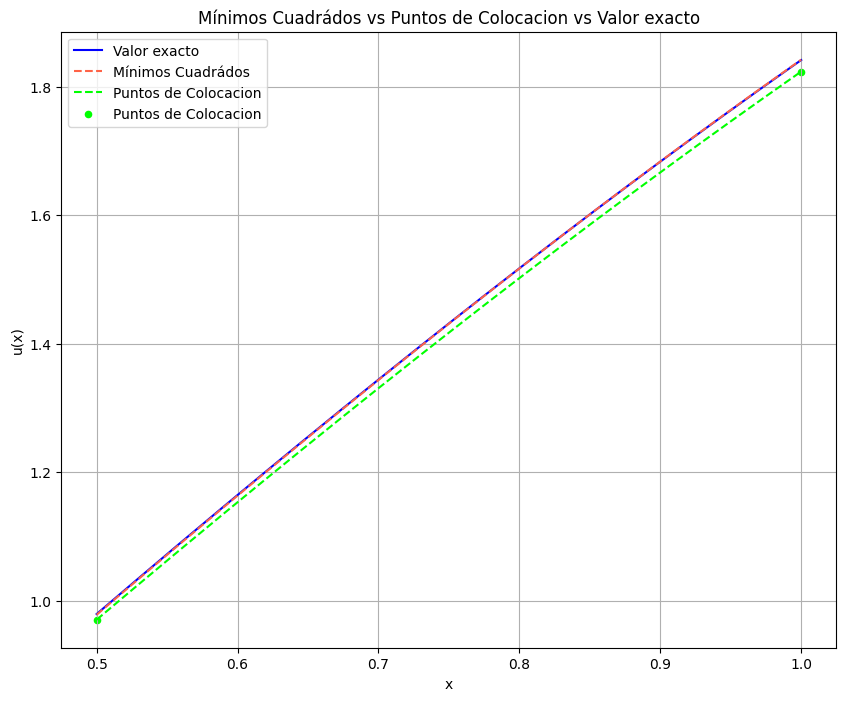

In [18]:
xx = np.linspace(0.5, 1, 200)                        # Valores en X
ypuntos = valorespuntos(xx)                          # Valores en Y2 (esperados)
plt.figure(figsize=(10,8))                           # Cramos un plano de 10x8
plt.plot(xx, yy, label="Valor exacto", color="blue")                   # Linea exactos
plt.plot(xx, y2,"--", label="Mínimos Cuadrádos", color="tomato")            # Linea Mínimos Cuadrádos
plt.plot(xx, ypuntos,"--", label="Puntos de Colocacion", color="lime")      # Linea Puntos de Colocacion
plt.scatter([0.5, 1.0], valorespuntos(np.array([0.5, 1.0])), color="lime", s=20, label="Puntos de Colocacion") # Puntos de Colocacion
plt.title("Mínimos Cuadrádos vs Puntos de Colocacion vs Valor exacto")                 # Titulo
plt.xlabel("x")                                      # Etiqueta en X
plt.ylabel("u(x)")                                   # Etiqueta en Y
plt.grid()                                           # Cuadricula
plt.legend()                                         # Etiquetas
plt.show()                                           # Mostrar

<font size=3> Calculamos el error

---

In [19]:
xx = np.linspace(0, 1, 10)                    # Valores en X
vex = valorex(xx)                             # Valores exactos
v1 = valores(xx)                              # Valores Minimos Cuadrados

error = abs(vex-v1)                           # Error Minimos Cuadrados

tabla = list(zip(xx, vex, v1, error))         # Creamos una tabla con los valores
head = ["x", "Valor exacto", "Minimos Cuadrados", "Error absoluto Minimos"]  # Titulos
print(tabulate(tabla, headers=head, tablefmt="heavy_grid"))                  # Imprimimos la tabla

┏━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        x ┃   Valor exacto ┃   Minimos Cuadrados ┃   Error absoluto Minimos ┃
┣━━━━━━━━━━╋━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━━━━━┫
┃ 0        ┃       0        ┃            0        ┃              0           ┃
┣━━━━━━━━━━╋━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━━━━━┫
┃ 0.111111 ┃       0.221994 ┃            0.221837 ┃              0.000157084 ┃
┣━━━━━━━━━━╋━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━━━━━┫
┃ 0.222222 ┃       0.44262  ┃            0.44212  ┃              0.000500445 ┃
┣━━━━━━━━━━╋━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━━━━━┫
┃ 0.333333 ┃       0.660528 ┃            0.659675 ┃              0.000853417 ┃
┣━━━━━━━━━━╋━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━━━━━┫
┃ 0.444444 ┃       0.874401 ┃            0.873328 ┃              0.00107286  ┃
┣━━━━━━━━━━╋━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━╋━

<font size=3> Comparamos con el metodo anterior

---

In [20]:
vpuntos = valorespuntos(xx)                     # Valores Puntos de Colocacion

error2 = abs(v1-vpuntos)                        # Error Puntos a Minimos

tabla = list(zip(xx, v1, vpuntos, error2))      # Creamos una tabla con los valores
head = ["x", "Minimos Cuadrados", "Puntos de Colocacion", "Error de Puntos a Minimos"]  # Titulos
print(tabulate(tabla, headers=head, tablefmt="heavy_grid"))                             # Imprimimos la tabla

┏━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        x ┃   Minimos Cuadrados ┃   Puntos de Colocacion ┃   Error de Puntos a Minimos ┃
┣━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┫
┃ 0        ┃            0        ┃               0        ┃                 0           ┃
┣━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┫
┃ 0.111111 ┃            0.221837 ┃               0.221335 ┃                 0.000502031 ┃
┣━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┫
┃ 0.222222 ┃            0.44212  ┃               0.440249 ┃                 0.00187099  ┃
┣━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┫
┃ 0.333333 ┃            0.659675 ┃               0.655773 ┃                 0.00390119  ┃
┣━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┫
┃ 0.444444

<font size=3> Calculamos el error de la Norma

---

<font size=2 color=tomato>np.max

Encuentra el valor max, dentro del vector error

<font size=2 color=tomato>norma

Contiene el error absoluto máximo con la norma infinito

In [21]:
norma = np.max(error)
print("El error de la Norma de Minimos Cuadrados", norma)

norma2 = np.max(abs(vex-vpuntos))
print("El error de la Norma de Puntos de Colocacion", norma2)

El error de la Norma de Minimos Cuadrados 0.0010728601999341336
El error de la Norma de Puntos de Colocacion 0.01794157304319066


<font size=3> Como podemos comparar, el metodo de <font color="tomato">Mínimos Cuadrádos es mejor </font><font size=3>ya que su error de la Norma Max es menor a comparacion del metodo de Puntos de Colocacion

---